In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
data.shape

(1059, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
print('checking for duplicates records/rows: \n')
if data.duplicated().any():
  print('duplicates found')
else:
  print('no duplicates found')

checking for duplicates records/rows: 

duplicates found


In [8]:
print("Display Duplicate rows")
data[data.duplicated()]

Display Duplicate rows


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [9]:
print('Drop Duplicate')
data1 = data.drop_duplicates()
data1.shape

Drop Duplicate


(83, 8)

In [10]:
print("checking for missing valuesin dataset")
data1.isnull().sum()

checking for missing valuesin dataset


,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [12]:
data1.describe()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.668675,43.698795,0.493976,0.397590,0.602410,0.433735,251.313253
std,0.986856,9.379187,0.503003,0.492375,0.492375,0.498602,4.577058
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000
50%,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [13]:
data1.groupby('Grade').mean().T

Grade,high,low,medium
pH,6.665217,6.726923,6.626471
Temprature,39.913043,51.500000,40.294118
Taste,0.695652,0.500000,0.352941
Odor,0.695652,0.461538,0.147059
Fat,0.956522,0.653846,0.323529
Turbidity,0.608696,0.615385,0.176471
Colour,252.739130,251.615385,250.117647


In [16]:
print('Unique values')
for col in data1.columns:
  print(data1[col].value_counts)
  print("--------------------------")
  print("")

Unique values
<bound method IndexOpsMixin.value_counts of 0      6.6
1      6.6
2      8.5
3      9.5
4      6.6
      ... 
930    6.6
942    6.6
957    6.8
985    6.5
998    6.6
Name: pH, Length: 83, dtype: float64>
--------------------------

<bound method IndexOpsMixin.value_counts of 0      35
1      36
2      70
3      34
4      37
       ..
930    38
942    45
957    41
985    45
998    43
Name: Temprature, Length: 83, dtype: int64>
--------------------------

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      1
4      0
      ..
930    0
942    1
957    1
985    1
998    0
Name: Taste, Length: 83, dtype: int64>
--------------------------

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
930    1
942    0
957    1
985    0
998    0
Name: Odor, Length: 83, dtype: int64>
--------------------------

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      0
      ..
930    1
942

In [18]:
data1.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

KeyError: 'Fat'

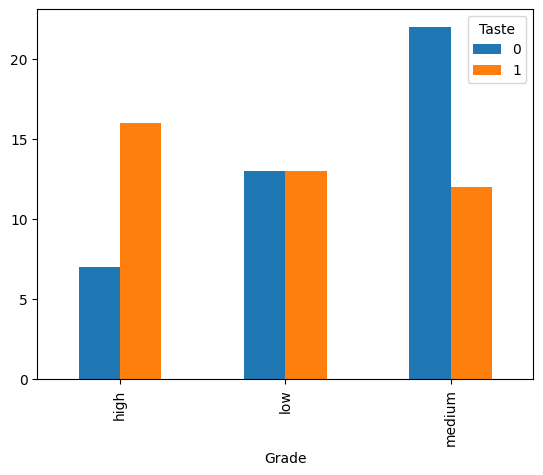

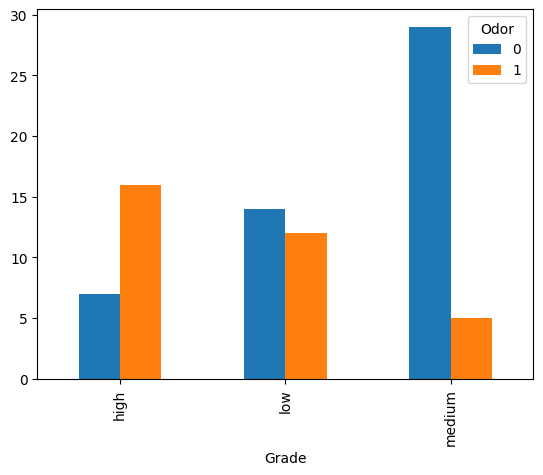

In [30]:
cols = ['Taste', 'Odor', 'Fat', 'Turbidity']
for col in cols:
  pd.crosstab(data1.Grade,data1[col]).plot(kind = 'bar')

In [31]:
data1['Grade'].value_counts()

,count
Grade,
medium,34
low,26
high,23


<Axes: xlabel='Grade'>

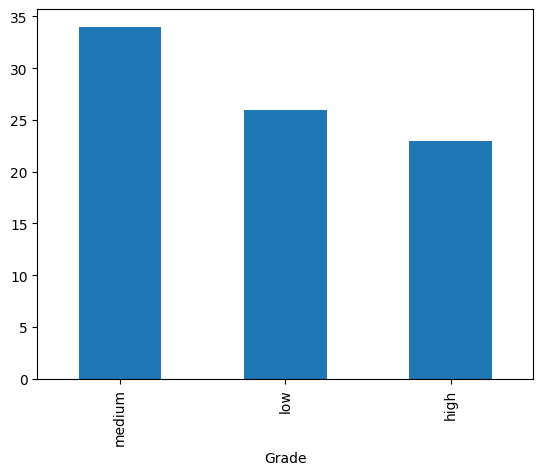

In [33]:
data1['Grade'].value_counts().plot(kind = 'bar')

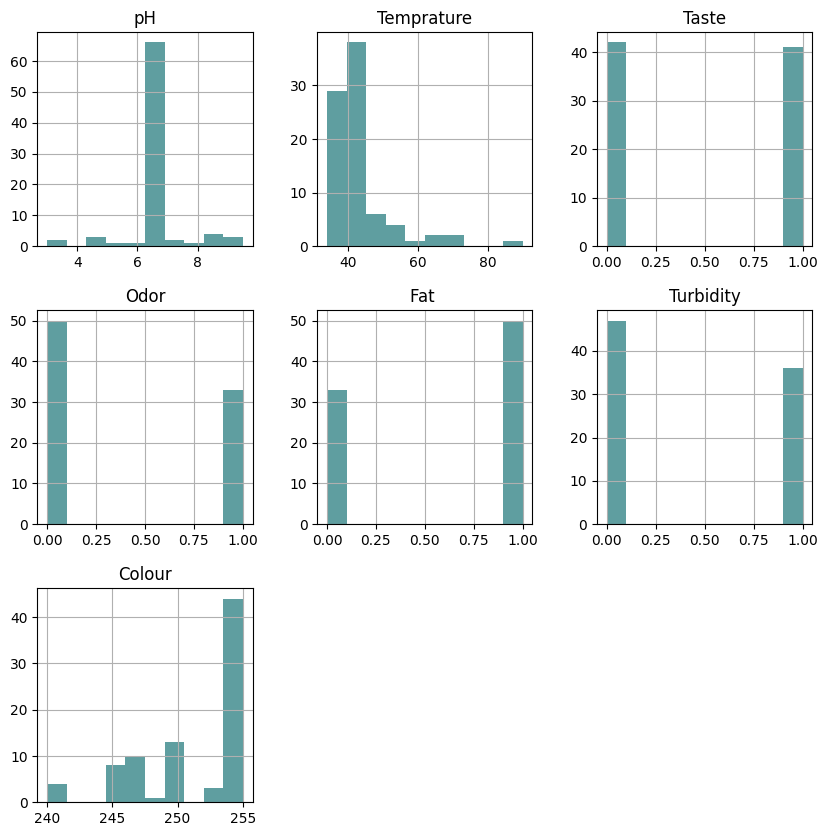

In [32]:
data_hist_plot = data1.hist(figsize = (10,10), color = "#5F9EA0")

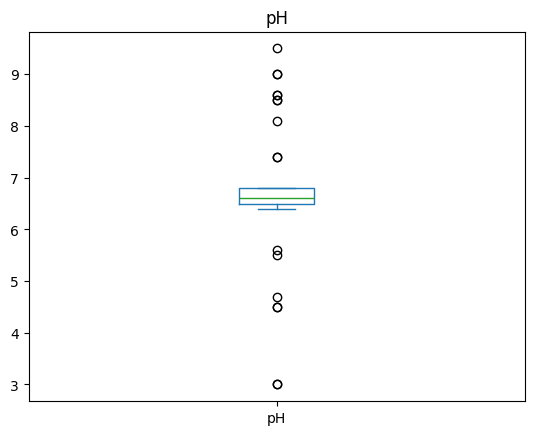

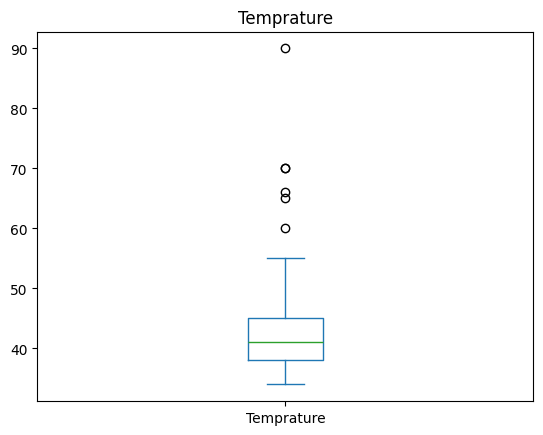

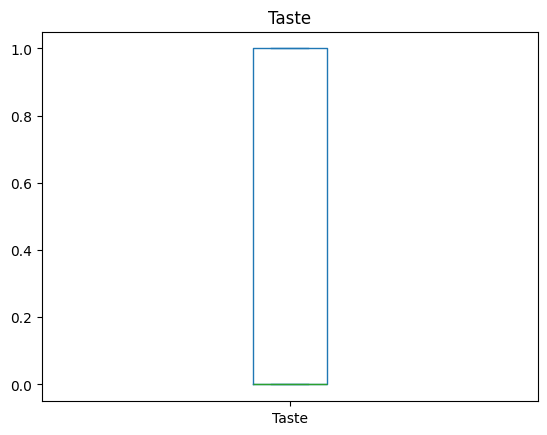

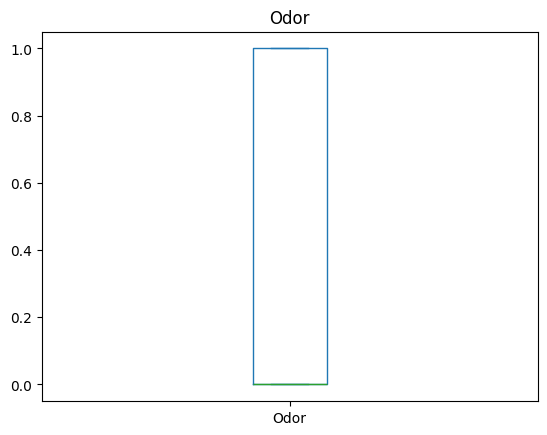

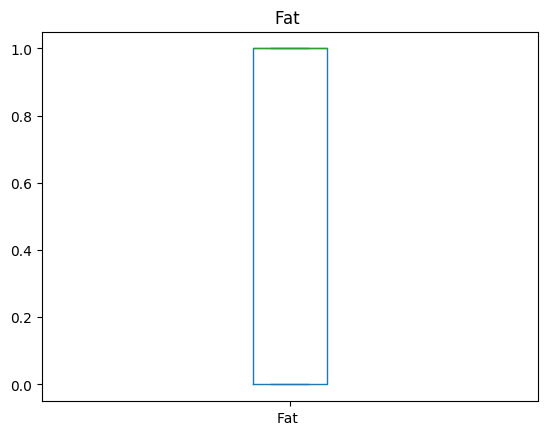

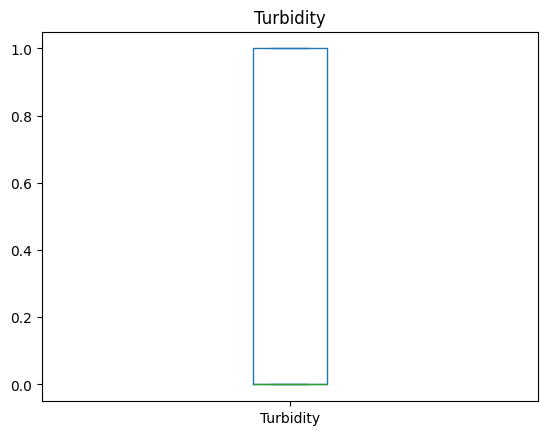

In [36]:
# Assuming 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', and potentially other columns from data1 are your numerical features
num_cols = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'] # Add other numerical column names as needed

for col in num_cols:
  data1[col].plot(kind= 'box')
  plt.title(col)
  plt.show()

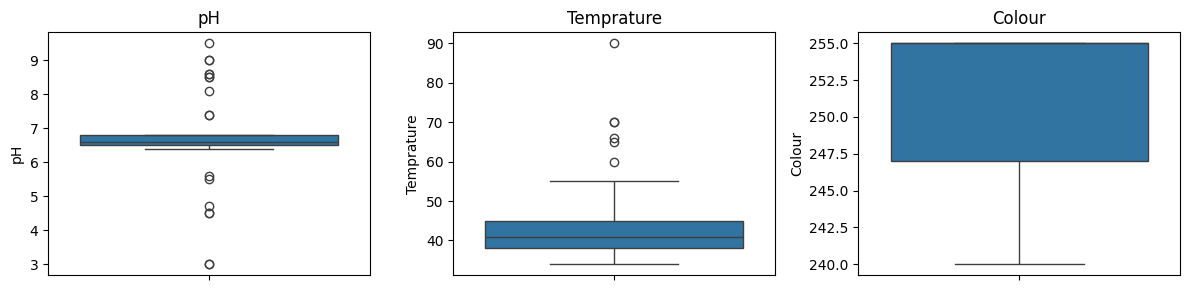

In [38]:
cols = ['pH','Temprature','Colour']
fig, axes = plt.subplots(ncols = 3, figsize=(12, 3))
for column,axis in zip(cols, axes):
  sns.boxplot(data = data1[column],ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

In [40]:
print('convert Target variable [Grade] into Numbers')
print("low = 0, medium = 1, high = 2")

convert Target variable [Grade] into Numbers
low = 0, medium = 1, high = 2


In [41]:
def grade_label(x):
  if x == 'high':
    return 2
  elif x == 'medium':
    return 1
  else:
    return 0

data1['Grade'] = data1['Grade'].apply(lambda x: grade_label(x))

print("Target variable after encoding")
data1.head()

Target variable after encoding


<ipython-input-41-e0b0fbb54a39>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Grade'] = data1['Grade'].apply(lambda x: grade_label(x))


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [42]:
print("x-Features and y-Lables")
x = data1.drop('Grade', axis = 1)
y = data1['Grade']
print(x.head())
print("")
print("y-label")
print(y.head())

x-Features and y-Lables
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.6          35      1     0     1          0     254
1  6.6          36      0     1     0          1     253
2  8.5          70      1     1     1          1     246
3  9.5          34      1     1     0          1     255
4  6.6          37      0     0     0          0     255

y-label
0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64


In [43]:
print('splitting the dat into training and testing')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42,stratify=y)
print("Training size = ", x_train.shape)
print("Testing size = ", x_test.shape)


splitting the dat into training and testing
Training size =  (66, 7)
Testing size =  (17, 7)
